In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Initial Setup

In [2]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikunjaparida","key":"f82ab329b12eecda16b2d9a4c4e53d77"}'}

In [3]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [4]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# List available datasets.
!kaggle datasets list

ref                                                         title                                               size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                           Chocolate Sales Data 📊🍫                            14473  2025-03-19 03:51:40.270000          17706        299  1.0              
adilshamim8/student-depression-dataset                      Student Depression Dataset                        467020  2025-03-13 03:12:30.423000           8871        131  1.0              
meleknur/global-internet-usage-by-country-2000-2023         Global Internet Usage by Country (2000-2023)       17617  2025-03-25 15:34:00.883000           1580         24  1.0              
albertobircoci/historical-prices-of-major-natural-

In [6]:
import os
import kagglehub

# Download latest version
#path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-small")

#print("Path to dataset files:", path)

In [7]:

import pandas as pd
import torch
import numpy as np
import os
gpu = torch.cuda.is_available()
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)

if not gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')
    print(gpu_info)

CUDA is not available.  Training on CPU ...


In [8]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # split for validation sets
from sklearn.preprocessing import normalize # normalization of the matrix
from scipy.signal import convolve2d # convolutionof the 2D signals
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from PIL import Image
from io import BytesIO
from skimage.transform import resize
import cv2
import scipy
from tqdm.auto import tqdm, trange

import tensorflow as tf
import tensorflow.keras as keras
import requests

from tensorflow.keras.layers import Activation, Layer
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG19

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Add, Input, Concatenate
from keras.models import Model
from keras import preprocessing
from keras.layers import GlobalMaxPooling2D
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

tf.version.VERSION




'2.18.0'

In [9]:
dataset_path='/content/drive/MyDrive/e-comerce/'
file_csv_path='/content/drive/MyDrive/e-comerce/styles/'
image_path ='/content/drive/MyDrive/e-comerce/images/'
os.listdir(dataset_path)

['styles',
 '.ipynb_checkpoints',
 'images.zip',
 'images',
 'df_summer_woman_ethinic.csv',
 'df_fall_woman_casual.csv',
 'df_fall_man_formal.csv',
 'df_summer_boys_casual.csv',
 'df_summer_girls_casual.csv',
 'df_fall_boys_casual.csv',
 'df_fall_girls_casual.csv',
 'df_summer_man_casual.csv']

In [10]:
df = pd.read_csv(file_csv_path + "styles.csv")

In [11]:
# Add columns
df['images'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44441 entries, 0 to 44440
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44441 non-null  int64  
 1   gender              44441 non-null  object 
 2   masterCategory      44441 non-null  object 
 3   subCategory         44441 non-null  object 
 4   articleType         44441 non-null  object 
 5   baseColour          44426 non-null  object 
 6   season              44420 non-null  object 
 7   year                44440 non-null  float64
 8   usage               44124 non-null  object 
 9   productDisplayName  44434 non-null  object 
 10  images              44441 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.7+ MB


In [13]:
df.isnull().sum()

,0
id,0
gender,0
masterCategory,0
subCategory,0
articleType,0
baseColour,15
season,21
year,1
usage,317
productDisplayName,7


In [14]:
df['baseColour'] = df['baseColour'].fillna(df['baseColour'].mode().iloc[0])
df['season'] = df['season'].fillna(df['season'].mode().iloc[0])
df['year'] = df['year'].fillna(df['year'].mode().iloc[0])
df['baseColour'] = df['baseColour'].fillna(df['baseColour'].mode().iloc[0])
df['usage'] = df['usage'].fillna(df['usage'].mode().iloc[0])

In [15]:
df.isnull().sum()

,0
id,0
gender,0
masterCategory,0
subCategory,0
articleType,0
baseColour,0
season,0
year,0
usage,0
productDisplayName,7


In [16]:
df_summer_woman_ethinic = df[(df["season"] == 'Summer') & (df["gender"] == 'Women') & (df["masterCategory"] == 'Apparel')  & (df['articleType']=='Kurtas') & (df['usage'] =='Ethnic') ]
df_fall_woman_casual = df[(df["season"] == 'Fall') & (df["gender"] == 'Women') & (df["masterCategory"] == 'Apparel')  & (df['articleType']=='Tshirts') & (df['usage'] =='Casual') ]
df_fall_man_formal = df[(df["season"] == 'Fall') & (df["gender"] == 'Men') & (df["masterCategory"] == 'Apparel')  & (df['articleType']=='Shirts') & (df['usage'] =='Formal') ]
df_summer_man_casual = df[(df["season"] == 'Summer') & (df["gender"] == 'Men') & (df["masterCategory"] == 'Apparel')  & (df['articleType']=='Tshirts') & (df['usage'] =='Casual') ]


In [17]:
frames = [df_summer_woman_ethinic, df_fall_woman_casual,df_fall_man_formal,df_summer_man_casual]
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,images
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch,30039.jpg


In [18]:
# Number of men's items vs Number of women's items
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
colors = {
    'Men': px.colors.sequential.RdBu[0],
    'Women': px.colors.sequential.RdBu[1],
    'Boys': px.colors.sequential.RdBu[2],
    'Girls': px.colors.sequential.RdBu[3],
    'Unisex': px.colors.sequential.RdBu[4]
    }

fig = px.histogram(df, df['gender'],color='gender', barmode='group',
             title="Number of men's items vs Number of women's items")

fig.show()

In [19]:
articles=pd.value_counts(df['articleType'])
fig = go.Figure([go.Bar(x=articles.index, y=articles.values , text=articles.values,marker_color='indianred')])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

<ipython-input-19-4e9ab0a59083>:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



<Axes: xlabel='gender', ylabel='count'>

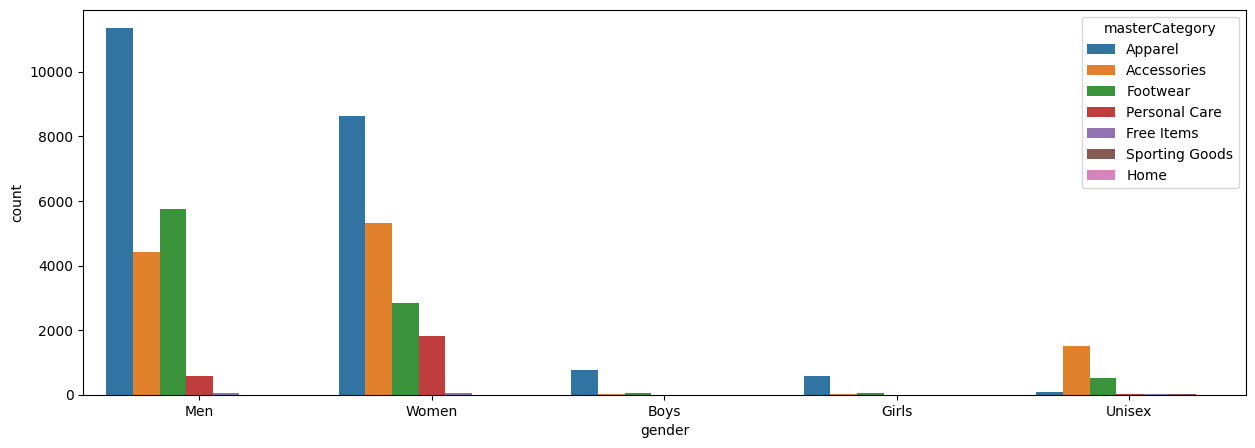

In [20]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x=df['gender'], hue=df['masterCategory'])

In [21]:
seasons_counts=pd.value_counts(df['season'])

fig = go.Figure(data=[go.Scatter(
    x=seasons_counts.index, y=seasons_counts.values,
    mode='markers',
    marker=dict(
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        opacity=[1, 0.8, 0.6, 0.4],
        size=[40, 60, 80, 100])
)])
fig.show()

<ipython-input-21-d6e7edc45e38>:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



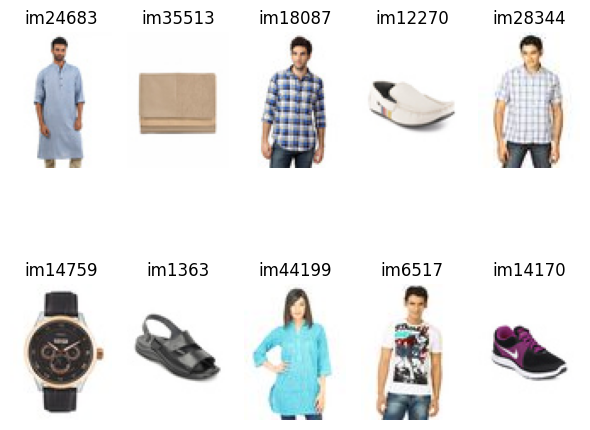

In [31]:

import cv2 as cv
def show_images(figures, nrows = 1, ncols=1,figsize=(6, 6)):
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        ax.ravel()[ind].imshow(cv.cvtColor(figures[title], cv.COLOR_BGR2RGB))
        ax.ravel()[ind].set_title(title)
        ax.ravel()[ind].set_axis_off()
    plt.tight_layout()

def img_path(img_name):
    return image_path + img_name

def load_image(img_name, resized_fac = 0.1):
    img = cv.imread(img_path(img_name))
    return img

#Showing 10 sample image
figures = {'im'+str(i): load_image(row['images']) for i, row in df.sample(10).iterrows()}
show_images(figures, 2, 5)


In [ ]:
#!ls "/content/drive/My Drive/"
#!unzip -q "/content/drive/My Drive/e-comerce/images.zip"
#!rm  -rf "/content/images/"

In [24]:
#load_image(df.iloc[0].image).shape
img_width, img_height, _ = 128, 128, 3
# Pre-Trained Model
base_model_ResNet50 = ResNet50(weights='imagenet', include_top=False, input_shape = (img_width, img_height, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
base_model_ResNet50.trainable = False

# Add Layer Embedding
model = keras.Sequential([
    base_model_ResNet50,
    GlobalMaxPooling2D()
])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 4, 4, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [27]:
def create_embedding(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)

    predict = model.predict(x).reshape(-1)
    return predict

In [28]:
#df.head(10)
emb = create_embedding(model, df.iloc[6].images)
print(emb)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[ 0.        8.847565  4.034243 ...  7.110091  0.       10.288344]


(80, 60, 3)


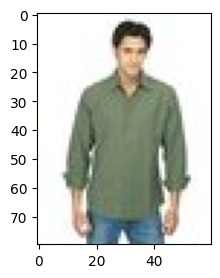

In [36]:
img_array = load_image(df.iloc[6].images)
plt.figure(figsize = (3,3))
plt.imshow(cv.cvtColor(img_array, cv.COLOR_BGR2RGB))
print(img_array.shape)


In [37]:
# Get embedding
def get_embedding(df):
    df_tmp = df
    df_emb = df_tmp['images'].apply(lambda img: create_embedding(model, img))
    df_emb = df_emb.apply(pd.Series)
    return df_emb

In [38]:
# Create embeddings for all categories
#df_summer_woman_ethinic_emb = get_embedding(df_summer_woman_ethinic)
print(df_summer_woman_ethinic.columns)
df_summer_woman_ethinic_emb = pd.read_csv('/content/drive/My Drive/e-comerce/df_summer_woman_ethinic.csv')


Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName',
       'images'],
      dtype='object')


In [39]:
# Create embeddings for all categories
#df_fall_woman_casual_emb = get_embedding(df_fall_woman_casual)
print(df_fall_woman_casual.columns)
df_fall_woman_casual_emb= pd.read_csv('/content/drive/My Drive/e-comerce/df_fall_woman_casual.csv')

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName',
       'images'],
      dtype='object')


In [101]:
#df_fall_woman_casual_emb.to_csv('/content/drive/My Drive/e-comerce/df_fall_woman_casual.csv')

In [40]:
# Create embeddings for all categories
#df_fall_man_formal_emb = get_embedding(df_fall_man_formal)
print(df_fall_man_formal.columns)
df_fall_man_formal_emb = pd.read_csv('/content/drive/My Drive/e-comerce/df_fall_man_formal.csv')

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName',
       'images'],
      dtype='object')


In [103]:
#df_fall_man_formal_emb.to_csv('/content/drive/My Drive/e-comerce/df_fall_man_formal.csv')

In [41]:
#df_summer_man_casual_emb = get_embedding(df_summer_man_casual)
#df_summer_man_casual_emb.to_csv('/content/drive/My Drive/e-comerce/df_summer_man_casual.csv')

df_summer_man_casual_emb = pd.read_csv('/content/drive/My Drive/e-comerce/df_summer_man_casual.csv')



In [42]:
from sklearn.metrics.pairwise import pairwise_distances
# Calcule distance matrix using cosine similarity
def get_cosine_similarity(df_emb):
    cos_sim = 1-pairwise_distances(df_emb, metric='cosine')
    return cos_sim

cos_summer_woman_ethinic = get_cosine_similarity(df_summer_woman_ethinic_emb)
cos_fall_woman_casual = get_cosine_similarity(df_fall_woman_casual_emb)
cos_fall_man_formal = get_cosine_similarity(df_fall_man_formal_emb)
cos_summer_man_casual = get_cosine_similarity(df_summer_man_casual_emb)

cos_summer_man_casual[:4, :4]


array([[1.        , 0.77715743, 0.59646068, 0.69136123],
       [0.77715743, 1.        , 0.57912357, 0.71782757],
       [0.59646068, 0.57912357, 1.        , 0.63807232],
       [0.69136123, 0.71782757, 0.63807232, 1.        ]])

In [43]:
print(df_summer_woman_ethinic.index)
print(df_fall_woman_casual.index)
print(df_fall_man_formal.index)
print(df_summer_man_casual.index)



Index([   43,    52,   122,   191,   224,   249,   258,   312,   398,   426,
       ...
       43972, 43986, 44003, 44025, 44062, 44223, 44318, 44341, 44358, 44393],
      dtype='int64', length=1071)
Index([  202,   515,   620,   639,   656,  1040,  1165,  1576,  1628,  1782,
       ...
       42735, 43179, 43297, 43665, 43862, 43916, 43921, 44073, 44310, 44434],
      dtype='int64', length=274)
Index([   15,    48,   433,   503,   782,   784,   822,   921,  1000,  1009,
       ...
       43705, 43796, 43845, 43937, 44094, 44178, 44216, 44226, 44256, 44403],
      dtype='int64', length=536)
Index([    4,     5,    55,    82,    93,    98,   146,   159,   167,   184,
       ...
       44222, 44261, 44263, 44275, 44276, 44295, 44303, 44333, 44351, 44412],
      dtype='int64', length=2707)


In [44]:
def get_indices(df):
    indices = pd.Series(range(len(df)), df.index)
    return indices

In [45]:
# Function that get summer-ethenic-woman fashion recommendations based on the cosine similarity score

def get_recommender_result(idx_ref,indices,cos_matrix,top_n = 5):

    sim_idx    = indices[idx_ref]
    sim_scores = list(enumerate(cos_matrix[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    return indices.iloc[idx_rec].index, idx_sim

In [46]:
# Display recommendations
# Recommendations->summer season ehinic Kurtas for woman

def plot_figure(idx_ref,idx_rec, idx_sim,df):
  plt.imshow(cv.cvtColor(load_image(df.iloc[idx_ref].images), cv.COLOR_BGR2RGB),aspect= None)
  # generation of a dictionary of (title, images)
  figures = {'im'+str(i): load_image(row.images) for i, row in df.loc[idx_rec].iterrows()}
  # plot of the images in a figure, with 2 rows and 3 columns
  show_images(figures, 2, 3)

In [47]:
indices_swe = get_indices(df_summer_woman_ethinic)
indices_fwc = get_indices(df_fall_woman_casual)
indices_fmf = get_indices(df_fall_man_formal)
indices_smc = get_indices(df_summer_man_casual)


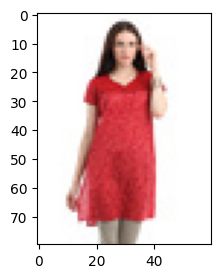

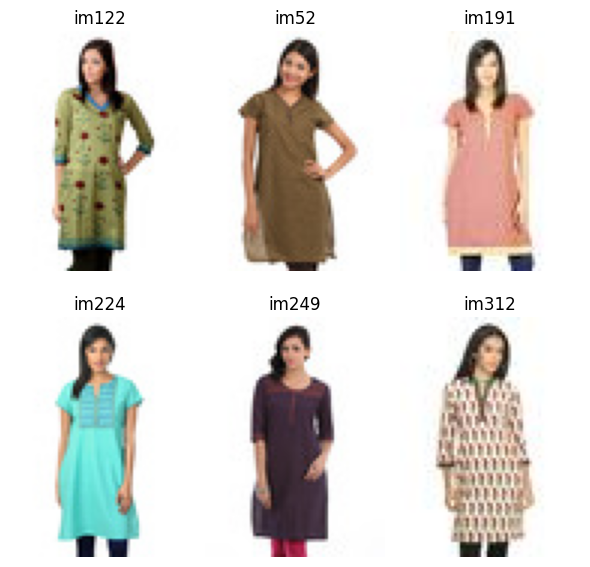

In [48]:

#Get recomender for summer season ehinic Kurtas for woman
idx_ref = 43
idx_rec, idx_sim = get_recommender_result(idx_ref, indices_swe,cos_summer_woman_ethinic,top_n = 6)
plt.figure(figsize = (3,3))
plot_figure(idx_ref,idx_rec, idx_sim,df_summer_woman_ethinic)


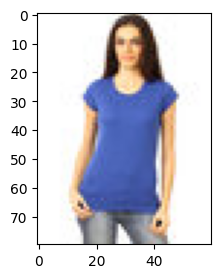

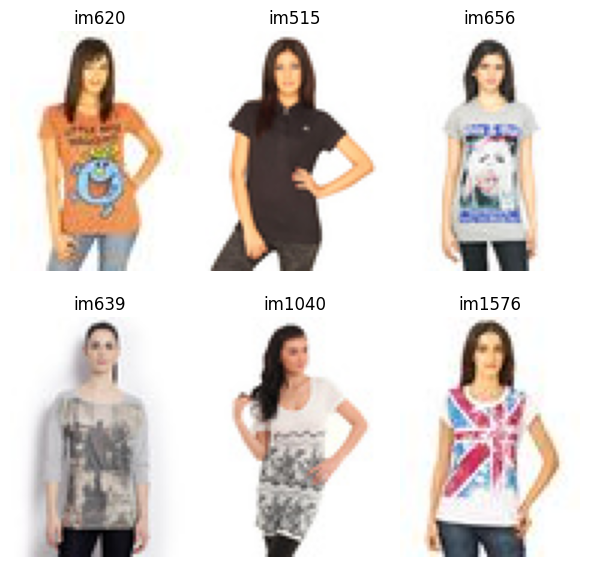

In [49]:
#Get recomender for Fall season casual T-Shirts for woman

idx_ref = 202
idx_rec, idx_sim = get_recommender_result(idx_ref, indices_fwc,cos_fall_woman_casual,top_n = 6)
plt.figure(figsize = (3,3))
plot_figure(idx_ref,idx_rec, idx_sim,df_fall_woman_casual)

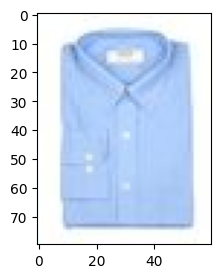

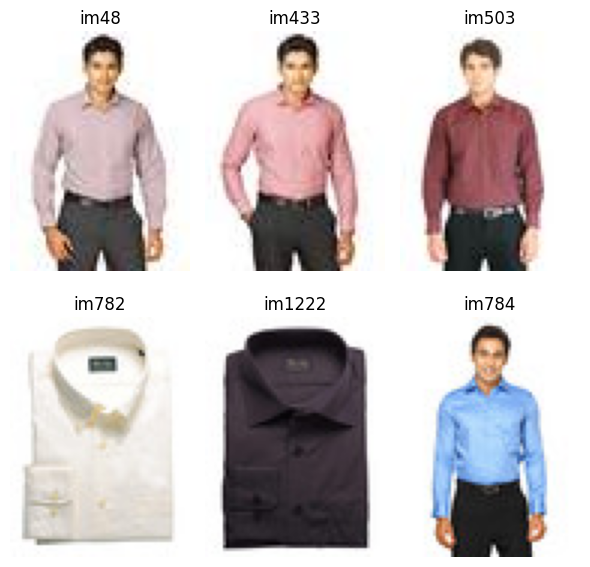

In [50]:
#Get recomender for Fall season casual Shirts for man

idx_ref = 15
idx_rec, idx_sim = get_recommender_result(idx_ref, indices_fmf,cos_fall_man_formal,top_n = 6)
plt.figure(figsize = (3,3))
plot_figure(idx_ref,idx_rec, idx_sim,df_fall_man_formal)

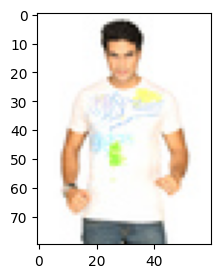

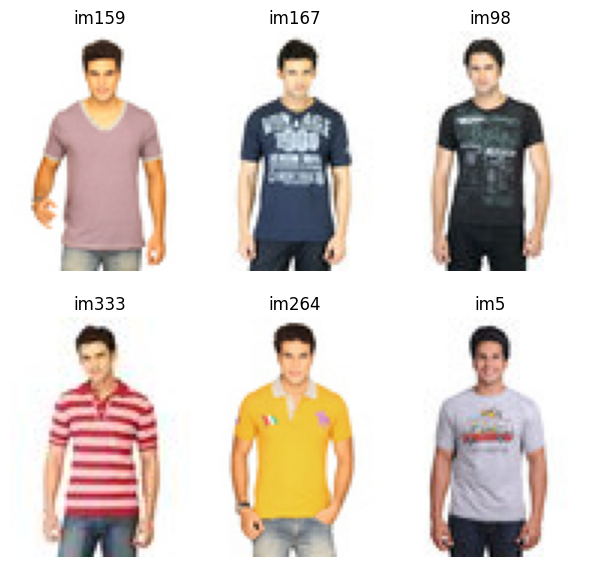

In [51]:
#Get recomender for Fall season casual T-Shirts for man

idx_ref = 82
idx_rec, idx_sim = get_recommender_result(idx_ref, indices_smc,cos_summer_man_casual,top_n = 6)
plt.figure(figsize = (3,3))
plot_figure(idx_ref,idx_rec, idx_sim,df_summer_man_casual)

In [52]:
# Creating a FashionRecommend class to include all features

import numpy as np
import pandas as pd
import os
import tensorflow as tf
import tensorflow.keras as keras
from keras import Model
from keras.applications.densenet import DenseNet121
from tensorflow.keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pathlib
from sklearn.metrics.pairwise import linear_kernel

class FashionRecommend:
    """ Production class for recommendations of fashion from similarity """

    def __init__(self, image_path, df_emb, styles_csv_path):
        self.img_path = image_path
        self.df_embeddings = df_emb
        self.styles_path = styles_csv_path
    # Helper functions
    def get_styles_dataframe(self):
        """ Load a dataframe contains styles details and images """
        styles_df = pd.read_csv(self.styles_path)
        styles_df['image'] = styles_df.apply(lambda x: str(x['id']) + ".jpg", axis=1) # (id.jpg)
        return styles_df

    def get_model(self):

        # Pre-Trained ResNet50 Model
        base_model_ResNet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
        base_model_ResNet50.trainable = False
        # Add Layer Embedding
        model = keras.Sequential([
            base_model_ResNet50,
            GlobalMaxPooling2D()
        ])

        return model

    def predict(self, model, img_path):
        """ Load and preprocess image then make prediction """
        # Reshape
        img = image.load_img(self.img_path, target_size=(100, 100)) # đoạn này có thể chuyển thành tải ảnh theo link về
        # img to Array
        img = image.img_to_array(img)
        # Expand Dim (1, w, h)
        img = np.expand_dims(img, axis=0)
        # Pre process Input
        img = preprocess_input(img)
        return model.predict(img)

    def get_sample_similarity(self):
        """ Get cosine similarity of custom image """
        model = self.get_model()
        df_embeddings = self.df_embeddings
        sample_image = self.predict(model, self.img_path)
        df_sample_image = pd.DataFrame(sample_image).reset_index(drop=True)
        sample_similarity = linear_kernel(df_sample_image, df_embeddings)
        return sample_similarity

    def normalize_similarity(self):
        """ Normalize similarity results-min/max method """
        cosine_similarity = self.get_sample_similarity()
        x_min = cosine_similarity.min(axis=1)
        x_max = cosine_similarity.max(axis=1)
        norm = (cosine_similarity-x_min)/(x_max-x_min)[:, np.newaxis]
        return norm

    def get_recommendations_dataframe(self):
        """ Get recommended images """
        normalized_similarity = self.normalize_similarity()
        df = self.get_styles_dataframe()
        # pairwsie similarity scores of all clothes with respect to one (index, value)
        sim_scores = list(enumerate(normalized_similarity[0]))

        # Sort based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get 0:5 similar clothes
        sim_scores = sim_scores[0:5]
        print(sim_scores)
        # Get the Apparel indices
        indices = [i[0] for i in sim_scores]

        # Return the top 5 most similar products
        return df['image'].iloc[indices]

    def show_recommendations(self):
        """ Print the top 5 most similar products"""
        rec_frame = self.get_recommendations_dataframe()
        rec_list = rec_frame.to_list()
        print(rec_list)
        #recommended images
        plt.figure(figsize=(20,20))
        j=0
        for i in rec_list:
            plt.subplot(6, 10, j+1)
            #matplotlib mpimg
            img_raw =  plt.imread("/content/drive/MyDrive/e-comerce/images/" + i) # Đoạn này trả về id là được
            plt.imshow(img_raw)
            plt.axis("off")
            j+=1
        plt.title("Recommended images",loc='left')
        plt.subplots_adjust(wspace=-0.5, hspace=1)
        plt.show()
        return

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[(54, np.float64(1.0)), (383, np.float64(0.9923234708964617)), (82, np.float64(0.9893797345293599)), (30, np.float64(0.9790573125382267)), (84, np.float64(0.9351322847808184))]
['59435.jpg', '8741.jpg', '13419.jpg', '37812.jpg', '43369.jpg']


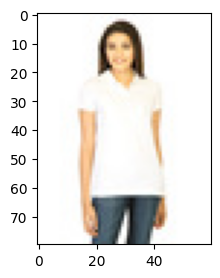

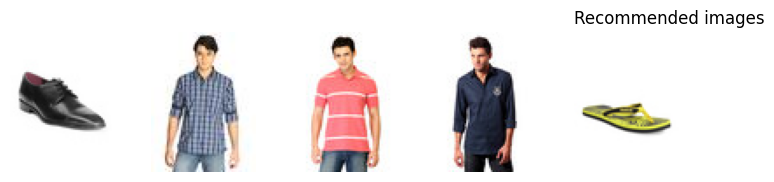

In [76]:
image_path = '/content/drive/MyDrive/e-comerce/images/13455.jpg'
img_raw =  plt.imread(image_path)
plt.figure(figsize = (3,3))
plt.imshow(img_raw)

styles_csv_path = '/content/drive/MyDrive/e-comerce/styles/styles.csv'
df_summer_woman_ethinic_emb = pd.read_csv('/content/drive/My Drive/e-comerce/df_summer_woman_ethinic.csv',index_col=0)
rec_obj = FashionRecommend(image_path, df_summer_woman_ethinic_emb, styles_csv_path)
rec_obj.show_recommendations()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[(2440, np.float64(1.0)), (1792, np.float64(0.9462894298567559)), (2472, np.float64(0.9414789892216308)), (624, np.float64(0.9147386355376915)), (2226, np.float64(0.8921542340844519))]
['1654.jpg', '25777.jpg', '15127.jpg', '47361.jpg', '30869.jpg']


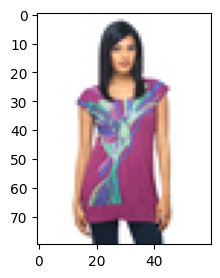

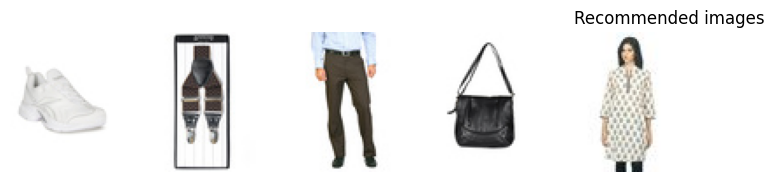

In [77]:
image_path = '/content/drive/MyDrive/e-comerce/images/33213.jpg'
img_raw =  plt.imread(image_path)
plt.figure(figsize = (3,3))
plt.imshow(img_raw)
styles_csv_path = '/content/drive/MyDrive/e-comerce/styles/styles.csv'
df_summer_man_casual_emb = pd.read_csv('/content/drive/My Drive/e-comerce/df_summer_man_casual.csv',index_col=0)
rec_obj = FashionRecommend(image_path, df_summer_man_casual_emb, styles_csv_path)
rec_obj.show_recommendations()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[(84, np.float64(1.0)), (198, np.float64(0.9849787245462452)), (131, np.float64(0.9424584390457866)), (400, np.float64(0.8924371584954779)), (158, np.float64(0.8690960506619007))]
['43369.jpg', '47366.jpg', '19547.jpg', '39523.jpg', '56670.jpg']


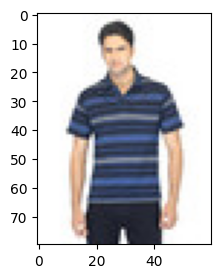

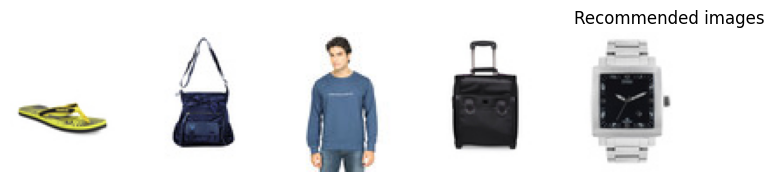

In [78]:
image_path = '/content/drive/MyDrive/e-comerce/images/31543.jpg'
img_raw =  plt.imread(image_path)
plt.figure(figsize = (3,3))
plt.imshow(img_raw)
styles_csv_path = '/content/drive/MyDrive/e-comerce/styles/styles.csv'
df_fall_man_formal_emb = pd.read_csv('/content/drive/My Drive/e-comerce/df_fall_man_formal.csv',index_col=0)
rec_obj = FashionRecommend(image_path, df_fall_man_formal_emb, styles_csv_path)
rec_obj.show_recommendations()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[(164, np.float64(1.0)), (272, np.float64(0.9735105660611398)), (219, np.float64(0.9715897082508884)), (85, np.float64(0.9469227483724566)), (171, np.float64(0.943136982075791))]
['36795.jpg', '13270.jpg', '54543.jpg', '48781.jpg', '44187.jpg']


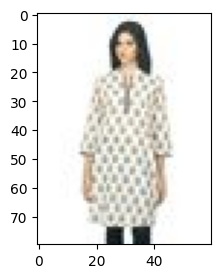

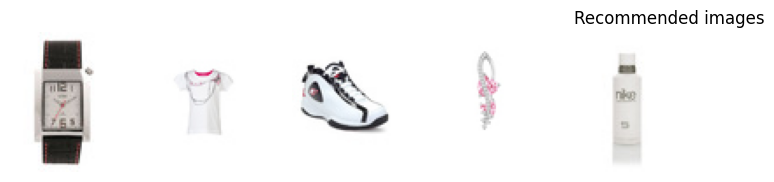

In [79]:

image_path = '/content/drive/MyDrive/e-comerce/images/30869.jpg'
img_raw =  plt.imread(image_path)
plt.figure(figsize = (3,3))
plt.imshow(img_raw)
styles_csv_path = '/content/drive/MyDrive/e-comerce/styles/styles.csv'
df_fall_woman_casual_emb = pd.read_csv('/content/drive/My Drive/e-comerce/df_fall_woman_casual.csv',index_col=0)
rec_obj = FashionRecommend(image_path, df_fall_woman_casual_emb, styles_csv_path)
rec_obj.show_recommendations()

In [80]:
import joblib

# Save the embeddings  and model
joblib.dump(df_fall_woman_casual_emb, 'df_fall_woman_casual_emb.joblib')
joblib.dump(df_fall_man_formal_emb, 'df_fall_man_formal_emb.joblib')
joblib.dump(df_summer_man_casual_emb, 'df_summer_man_casual_emb.joblib')
joblib.dump(df_summer_woman_ethinic_emb, 'df_summer_woman_ethinic_emb.joblib')

# Save the model
model.save('/content/drive/MyDrive/e-comerce/ResNet50_model.h5')